# Design eBlocks Tutorial

Welcome to the Design eBlocks tutorial! In this tutorial, we will explore the process of designing eBlocks for a gene sequence using Jupyter Notebook.

## What are eBlocks?

eBlocks are synthetic DNA sequences that are designed to introduce specific mutations into a target gene. These mutations can include single point mutations, multiple point mutations, insertions, and deletions. eBlocks are a powerful tool for studying gene function and can be used in various applications such as protein engineering, gene expression analysis, and drug discovery.

## Tutorial Overview

In this tutorial, we will cover the following topics:

1. Importing Required Modules and Packages
2. Loading and Analyzing the Gene Sequence
3. Parsing and Analyzing Mutation Data
4. Designing eBlocks
5. Visualizing eBlocks and Mutations
6. Designing Primers for eBlock Amplification

By the end of this tutorial, you will have a clear understanding of how to design eBlocks for a gene sequence and visualize the mutations introduced by these eBlocks.

Let's get started with the first step: importing the required modules and packages.

### 1. Importing Required Modules and Packages

In [2]:
import os
import sys

from src.mutation import Mutation
from src.sequence import Vector, Gene
from src.eblocks import Eblock, EblockDesign
import biotite.sequence as seq
from src.primer import DesignPrimers
from src.plot import Plot
from src.utils import SnapGene

%reload_ext autoreload
%autoreload 2

### 2. Loading and Analyzing the Gene Sequence

The desired mutations should be added to a txt file. 
Here, we create a Mutation() object and parse the specified mutations. 

In [3]:
# Create a Mutation object and parse the input mutations from the files/ directory

mutations_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'Msmegmatis_DnaE1_mutations_N=27.txt')

mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed
mutation_instance.print_mutations()

The selected mutations are:
	Mutation  	S5K       
	Mutation  	V35Y      
	Mutation  	T84Y      
	Insert    	R204-FTSMM
	Mutation  	S251R     
	Combined  	S267M, D276I, D304L
	Deletion  	S285-Q294 
	Mutation  	D326M     
	Mutation  	A327G     
	Mutation  	I352C     
	Mutation  	P380Y     
	Mutation  	R416H     
	Mutation  	D428G     
	Mutation  	Y507V     
	Insert    	G535-DDVIIC
	Mutation  	E556R     
	Combined  	N593I, L639S, G635L, S616V, D640E, V617L, P618G, L619V
	Mutation  	D611G     
	Mutation  	P694P     
	Mutation  	Q716L     
	Mutation  	V867L     
	Deletion  	A899-V904 
	Combined  	V968Q, I1013Y
	Mutation  	L1002K    
	Mutation  	L1052E    
	Mutation  	F1061T    
	Mutation  	V1084M    
	Mutation  	L1157T    


Next, we read the gene sequence and the vector that contains our gene of interest.

In [4]:
# Create a Plasmid object and parse the input plasmid from the files/ directory

sequence_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'A0QX55.fasta')
vector_file = os.path.join('example_data', 'Msmegmatis_DnaE1', 'vector.dna')

gene_instance = Gene()
gene_instance.parse_sequence(sequence_file)

vector_instance = Vector(gene=gene_instance)
vector_instance.parse_vector(vector_file)
print(vector_instance.length)

7871


We also define an output directory for the generated files and create a snapgene object for visualization

In [5]:
# Create a SnapGene instance to write the eBlocks features to a snapgene file

# Set output directory
output_dir = os.path.join('tutorial_output')

snapgene_instance = SnapGene(vector_instance=vector_instance,
                             gene_instance=gene_instance,
                             output_dir=output_dir)

We create an eBlockDesign instance that can initiate the design of the eblocks. Here, we choose as optimization method cost_optimization that aims to use as little basepairs as possible. Another option would be to do amount_optimization, that aims to cluster as many mutations as possible together, to get the lowest number of different eBlocks

In [6]:
# Create an Eblocks object based on the input mutations and the gene sequence

design_instance = EblockDesign(mutation_instance=mutation_instance,
                               vector_instance=vector_instance,
                               gene_instance=gene_instance,
                               output_dir=output_dir,
                               verbose=False,
                               cost_optimization=False,
                               amount_optimization=True)

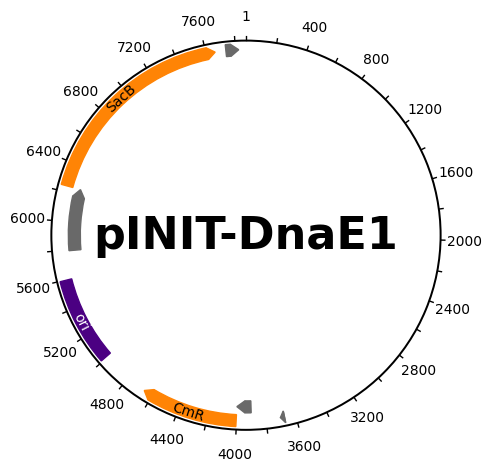

(<PolarAxes: >, <Figure size 500x500 with 1 Axes>)

In [7]:
# Create a Plots object and check the input vector

# Create the Plot object
plot_instance = Plot(mutation_instance=mutation_instance,
                     eblocks_design_instance=design_instance,
                     vector_instance=vector_instance,
                     gene_instance=gene_instance,
                     output_dir=output_dir,
                     show=True)

# Check the input vector
plot_instance.plot_vector(figsize=(5, 5))

In [8]:
# TODO Add DnaE1 gene sequence to vector
# TODO What are the other things in the vector that do not have a name?

In our vector we can see that our vector contains the SacB gene, has an origin of replication and contains a CmR (chloramphenicol) resistance marker

In [9]:

# TODO Show eBlocks in vector as well
# TODO Add plasmid visaulization of eBlock features


# from Bio import SeqIO
# from Bio.Graphics import GenomeDiagram
# from Bio.SeqFeature import SeqFeature, FeatureLocation

# # Parse the plasmid sequence
# plasmid_seq_record = SeqIO.read("plasmid_sequence.fasta", "fasta")

# # Create a GenomeDiagram object
# gd_diagram = GenomeDiagram.Diagram("Plasmid Map")

# # Add the sequence track
# gd_track = gd_diagram.new_track(1, name="Plasmid")
# gd_feature_set = gd_track.new_set()

# # Add the plasmid sequence
# gd_feature_set.add_feature(SeqFeature(FeatureLocation(0, len(plasmid_seq_record))), color="black")

# # Parse the GFF3 file to extract features
# # Assuming you have a function parse_gff3() that returns feature information
# features = parse_gff3("plasmid_features.gff3")

# # Add the features to the plasmid map
# for feature in features:
#     start = feature.start
#     end = feature.end
#     name = feature.attributes["Name"]
#     gd_feature_set.add_feature(SeqFeature(FeatureLocation(start, end)), color="blue", label=True, label_position="middle", label_size=8, label_angle=0, label_strand=0, name=name)

# # Draw the plasmid map
# gd_diagram.draw(format="linear", pagesize=(15*len(plasmid_seq_record), 400), fragments=1)
# gd_diagram.write("plasmid_map.png", "png")


In [10]:
# Run the eBlocks design and print the results

design_instance.run_design_eblocks()

In [11]:
for i in design_instance.wt_eblocks:
    print(i.name, i.sequence)

eBlock-1 ccgctcttctAtgagcggttcatctgcggggtcctccttcgtgcacctgcacaaccacaccgagtattcgatgctggacggtgccgcgaagatcacgcccatgctcgccgaggtggagcggctggggatgcccgcggtggggatgaccgaccacggaaacatgttcggtgccagcgagttctacaactccgcgaccaaggccgggatcaagccgatcatcggcgtggaggcatacatcgcgccgggctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacgggtgcagtcctacgccgacgtgtggacaccgcgcgaccggatgcccgtgtttccggtgcccgatgggcatgaccaggcgtcctggctgcgtcacgaggtggacgcc

In the process, for each mutation a different eBlock is created and a .gb file is made to easily view the clone in a sequence editor. 

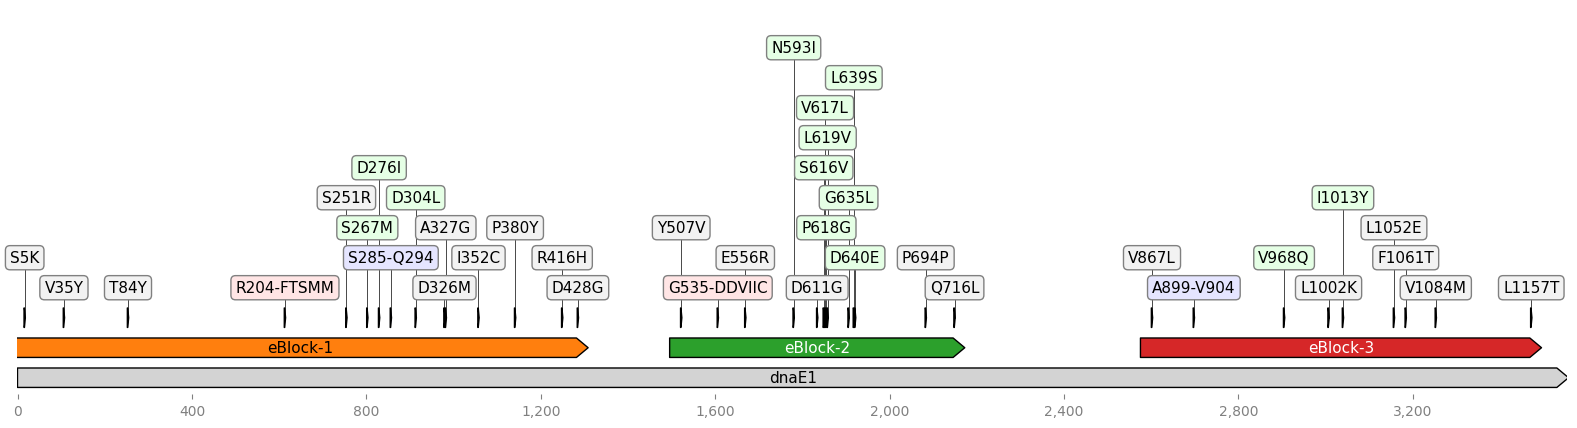

In [12]:
# Now that we have designed the eblocks, we can visualize them using the Plot class
plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

In [13]:
# TODO Describe the eblocks here, what you can see with each color etc

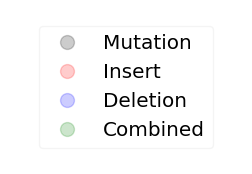

In [14]:
# Each type of mutations (insertions, deletions, substitutions) is represented by a different color, you can see the legend below

plot_instance.plot_mutation_legend()

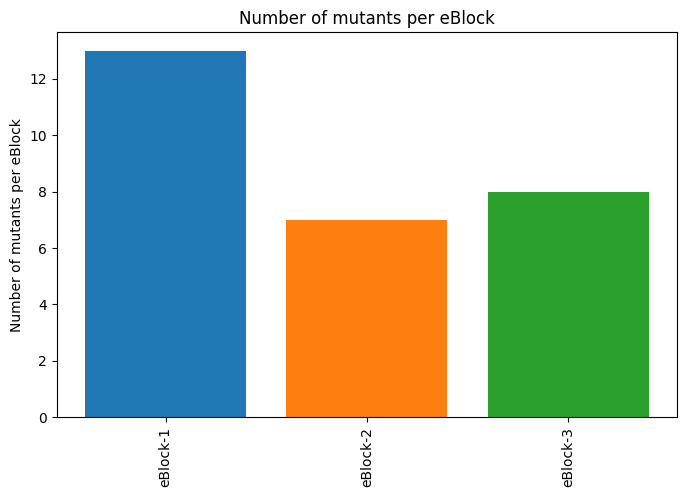

In [15]:
# To see how many mutations can be made in each eBlock, we can plot a histogram

plot_instance.plot_histogram_mutations()

In [16]:
# TODO Do some explanation here

In [17]:
# TODO Save the eblocks to a file

In [ ]:
# TODO (At the end of tutorial) Remake the eBlocks but optimize for amount of eBlocks

design_instance = EblockDesign(mutation_instance=mutation_instance,
                               vector_instance=vector_instance,
                               gene_instance=gene_instance,
                               output_dir=output_dir,
                               verbose=False,
                               cost_optimization=True,
                               amount_optimization=False)

design_instance.run_design_eblocks()
plot_instance.plot_eblocks_mutations(figure_length=20,
                                     figure_width=5)

In [134]:
# Remove all files in the output directory
import os
import shutil

def remove_all_files_and_folders(directory):
    # Check if the directory exists
    if os.path.exists(directory):
        shutil.rmtree(directory)  # Remove the entire directory and its contents
        os.makedirs(directory)      # Recreate the empty directory
    else:
        print(f"The directory {directory} does not exist.")

# Specify your directory here
remove_all_files_and_folders('tutorial_output')


In [21]:
# try primer3

import primer3

# Your sequence
sequence = "tggccgctcttctAtgagcggttcatctgcggggtcctccttcgtgcacctgcacaaccacaccgagtattcgatgctggacggtgccgcgaagatcacgcccatgctcgccgaggtggagcggctggggatgcccgcggtggggatgaccgaccacggaaacatgttcggtgccagcgagttctacaactccgcgaccaaggccgggatcaagccgatcatcggcgtggaggcatacatcgcgccgggctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcctcgcatgcttccttcgagggccagctgagcaagtggtcgcgcatggacgccgagctcatcgccgaacacgccgagggcatcatcatcaccaccggatgcccgtcgggggaggtgcagacccgcctgcggctcggccaggatcgggaggcgctcgaagccgcggcgaagtggcgggagatcgtcggaccggacaactacttccttgagctgatggaccacgggctgaccatcgaacgccgggtccgtgacggtctgctcgagatcggacgcgcgctcaacattccgcctcttgccaccaatgactgccactacgtgacccgcgacgccgcccacaaccatgaggctttgttgtgtgtgcagaccggcaagaccctctcggatccgaatcgcttcaagttcgacggtgacggctactacctgaagtcggccgccgagatgcgccagatctgggacgacgaagtgccgggcgcgtgtgactccaccttgttgatcgccgaacgggtgcagtcctacgccgacgtgtggacaccgcgcgaccggatgcccgtgtttccggtgcccgatgggcatgaccaggcgtcctggctgcgtcacgaggtggacgccgggcttcgccggcgatttccggccggtccgccggacgggtaccgcgagcgcgccgcctacgagatcgacgtcatctgctccaaaggtttcccatcgtactttctgatcgtcgccgacctgatcagctacgcgcggtcggcgggcataagggtgggtcccggccgcggctcggccgccggctcgctggtcgcctacgcgctgggcatcaccgacatcgacccgattccacacggtctgctgttcgagcggttcctcaaccccgagcgcacctcgatgcccgacatcgatatcgacttcgacgaccggcgccgcggtgagatggtgcgctacgcagccgacaagtggggccacgaccgggtcgcgcaggtcatcaccttcggcaccatcaaaaccaaagcggcgctgaaggattcggcgcgaatccactacgggcagcccgggttcgccatcgccgaccggatcaccaaggcgttgccgccggcgatcatggccaaagacatcccgctgtctgggatcaccgatcccagccacgaacggtacaaggaggccgccgaggtccgcggcctgatcgaaaccgacccggacgtacgcaccatctaccagaccgcacgcgggttggaaggcctgatccgcaacgcgggtgtgcacgcctgcgcggtgatcatgagcagcgagccgctgactgaggccatcccgttgtggaagcggccgcaggacggggccatcatcaccggctgggattacccggcgtgcgaggccatcggtctgctgaaaatggacttcctgggcctgcggaacctgacgatcatcggcgacgcgatcgacaacgtcagggccaacaggggtatcgacctcgacctggaatccgtgccgctggacgacaaggccacctatgagctgctgggccgcggcgacaccctgggcgtgttccagctcgacggcgggcccatgcgcgacctgctgcgccgcatgcagccgaccgggttcgaagacgtcgtcgccgttatcgcgctgtaccggcccggcccgatgggcatgaacgcacacaacgactatgccgaccgcaagaacaaccggcaggccatcaaacctattcacccggaactcgaagaaccgctgcgcgagatcctcgccgagacctacggcctcatcgtctatcaagagcagatcatgcgcatcgcgcagaaggtggcgagctactcgttggcccgcgccgacattctacgcaaggccatgggcaagaagaaacgcgaggtgctggagaaggagttcgagggcttctccgatggcatgcaggccaacgggttctctccggcggccatcaaggcgctgtgggacaccatcctgccgttcgctgactacgcgttcaacaagtcacatgccgccggctacggcatggtgtcctactggacggcctacctcaaggccaactatcccgccgagtacatggccggtctgttgacgtcggtcggcgacgataaagacaaggccgcggtttatctggccgactgccgcaagctcggcatcaccgtgctcccgcccgacgtcaacgaatctggcttgaacttcgcatcggtcggccaagacatccgctacgggctgggcgcggtgcgcaacgttggcgctaatgtcgtgggctcgttgctccaaacccgcaacgacaagggcaagttcaccgacttttcggactacctgaacaagatcgacatctcggcgtgcaacaagaaggtgaccgaatcgctgatcaaggcgggtgcgttcgactcgctggggcatgcccgcaagggtcttttcctggtgcacagcgatgcggtggactcggtgctgggcaccaagaaggccgaggcactggggcagttcgatctcttcggcagcaatgatgatgggaccggcaccgcagatcccgtgttcaccatcaaggtgcccgatgatgagtgggaggacaaacacaaactcgccctagagcgcgagatgctgggactgtacgtctcggggcatcccctcaacggtgtggcacacttgctggctgcccaggtcgacaccgcgatcccagcgatcctcgacggcgatgtccccaacgatgcccaagtgcgggtgggcggcatcctggcgtcggtgaaccggagggtcaacaaaaacggaatgccatgggcttcagcgcaattggaggatctcacgggcggcatcgaggtgatgttcttcccgcacacctactccagctatggtgccgacatcgtcgacgatgccgtcgtgctggtcaacgccaaggtggcggtccgtgacgaccgcatcgcattgatcgccaatgacctcacagtgcccgacttttccaacgccgaggtggagcggccgctggcggtcagcttgcccacccggcagtgcacctttgacaaggtgagtgcgctcaaacaggtgttggcgcgccaccccggcacctcgcaggtgcatctgcggctcatcagcggagaccggatcaccacgctggcacttgatcagtcgttgcgggtgacgccgtcgccggcgttgatgggtgacctcaaggagctgctcggccctggatgtctggggagttagtgaagagcggccaccgaggccgggagcggatttgaacgttgcgaagcaacggcccggagggtggcgggcaggacgcccgccataaactgccaggcatcaaattaagcagaaggccatcctgacggatggcctttttgcgtttctacaaactcttttgtttatttttctaaatacattcaaatatgtatccgctcatgaattccccgcgcgcgatgccctttcgtcttcgaataaatacctgtgacggaagatcacttcgcagaataaataaatcctggtgtccctgttgataccgggaagccctgggccaacttttggcgaaaatgagacgttgatcggcacgtaagaggttccaactttcaccataatgaaataagatcactaccgggcgtattttttgagttatcgagattttcaggagctaaggaagctaaaatggagaaaaaaatcactggatataccaccgttgatatatcccaatggcatcgtaaagaacattttgaggcatttcagtcagttgctcaatgtacctataaccagaccgttcagctggatattacggcctttttaaagaccgtaaagaaaaataagcacaagttttatccggcctttattcacattcttgcccgcctgatgaatgctcatccggaatttcgtatggcaatgaaagacggtgagctggtgatatgggatagtgttcacccttgttacaccgttttccatgagcaaactgaaacgttttcatcgctctggagtgaataccacgacgatttccggcagtttctacacatatattcgcaagatgtggcgtgttacggtgaaaacctggcctatttccctaaagggtttattgagaatatgtttttcgtctcagccaatccctgggtgagtttcaccagttttgatttaaacgtggcgaatatggacaacttcttcgcccccgttttcactatgggcaaatattatacgcaaggcgacaaggtgctgatgccgctggcgattcaggttcatcatgccgtctgtgatggcttccatgtcggcagaatgcttaatgaattacaacagtactgcgatgagtggcagggcggggcgtaatttttttaaggcagttattggtgcccttaaacgcctggttgctacgcctgaataagtgataataagcggatgaatggcagaaattcgagcccgcctaatgagcgggcttttttttagcccgcctaatgagcgggcttttttttcgaaagcaaattcgacccatcgcgcgcggggagtcaactcagcaaaagttcgatttattcaacaaagccacgttgtgtctcaaaatctctgatgttacattgcacaagataaaaatatatcatcatgcatgaccaaaatcccttaacgtgagttttcgttccactgagcgtcagaccccgtagaaaagatcaaaggatcttcttgagatcctttttttctgcgcgtaatctgctgcttgcaaacaaaaaaaccaccgctaccagcggtggtttgtttgccggatcaagagctaccaactctttttccgaaggtaactggcttcagcagagcgcagataccaaatactgtccttctagtgtagccgtagttaggccaccacttcaagaactctgtagcaccgcctacatacctcgctctgctaatcctgttaccagtggctgctgccagtggcgataagtcgtgtcttaccgggttggactcaagacgatagttaccggataaggcgcagcggtcgggctgaacggggggttcgtgcacacagcccagcttggagcgaacgacctacaccgaactgagatacctacagcgtgagctatgagaaagcgccacgcttcccgaagggagaaaggcggacaggtatccggtaagcggcagggtcggaacaggagagcgcacgagggagcttccagggggaaacgcctggtatctttatagtcctgtcgggtttcgccacctctgacttgagcgtcgatttttgtgatgctcgtcaggggggcggagcctatggaaaaacgccagcaacgcggcctttttacggttcctggccttttgctggccttttgctcacatgttctttcctgcgttatcccctgattctgtggataaccgtattaccgcctttgagtgagctgataccgctcgccgcagccgaacgaccgagcgcagcgagtcagtgagcgaggaagcggaagatcgggcccagccggcccacatatacctgccgttcactattatttagtgaaatgagatattatgatattttctgaattgtgattaaaaaggcaactttatgcccatgcaacagaaactataaaaaatacagagaatgaaaagaaacagatagattttttagttctttaggcccgtagtctgcaaatccttttatgattttctatcaaacaaaagaggaaaatagaccagttgcaatccaaacgagagtctaatagaatgaggtcgaaaagtaaatcgcgcgggtttgttactgataaagcaggcaagacctaaaatgtgtaaagggcaaagtgtatactttggcgtcaccccttacatattttaggtctttttttattgtgcgtaactaacttgccatcttcaaacaggagggctggaagaagcagaccgctaacacagtacataaaaaaggagacatgaacgatgaacatcaaaaagtttgcaaaacaagcaacagtattaacctttactaccgcactgctggcaggaggcgcaactcaagcgtttgcgaaagaaacgaaccaaaagccatataaggaaacatacggcatttcccatattacacgccatgatatgctgcaaatccctgaacagcaaaaaaatgaaaaatataaagttcctgagttcgattcgtccacaattaaaaatatctcttctgcaaaaggcctggacgtttgggacagctggccattacaaaacactgacggcactgtcgcaaactatcacggctaccacatcgtctttgcattagccggagatcctaaaaatgcggatgacacatcgatttacatgttctatcaaaaagtcggcgaaacttctattgacagctggaaaaacgctggccgcgtctttaaagacagcgacaaattcgatgcaaatgattctatcctaaaagaccaaacacaagaatggtcaggttcagccacatttacatctgacggaaaaatccgtttattctacactgatttctccggtaaacattacggcaaacaaacactgacaactgcacaagttaacgtatcagcatcagacagctctttgaacatcaacggtgtagaggattataaatcaatctttgacggtgacggaaaaacgtatcaaaatgtacagcagttcatcgatgaaggcaactacagctcaggcgacaaccatacgctgagagatcctcactacgtagaagataaaggccacaaatacttagtatttgaagcaaacactggaactgaagatggctaccaaggcgaagaatctttatttaacaaagcatactatggcaaaagcacatcattcttccgtcaagaaagtcaaaaacttctgcaaagcgataaaaaacgcacggctgagttagcaaacggcgctctcggtatgattgagctaaacgatgattacacactgaaaaaagtgatgaaaccgctgattgcatctaacacagtaacagatgaaattgaacgcgcgaacgtctttaaaatgaacggcaaatggtacctgttcactgactcccgcggatcaaaaatgacgattgacggcattacgtctaacgatatttacatgcttggttatgtttctaattctttaactggcccatacaagccgctgaacaaaactggccttgtgttaaaaatggatcttgatcctaacgatgtaacctttacttactcacacttcgctgtacctcaagcgaaaggaaacaatgtcgtgattacaagctatatgacaaacagaggattctacgcagacaaacaatcaacgtttgcgcctagcttcctgctgaacatcaaaggcaagaaaacatctgttgtcaaagacagcatccttgaacaaggacaattaacagttaacaaataaaaacgcaaaagaaaatgccgatatcctattggcattgcggccgcggtctcggcggtgggtcgtctagaggcatcaaataaaacgaaaggctcagtcgaaagactgggcctttcgttttatctgttgtttgtcggtgaacgctctcctgagtaggacaaatccgccgccctagacctagcggccggccgcaagcgctgcacggcctggt"
print(len(sequence))

sequence_cover = "caccgatcccagccacgaacggtacaaggaggccgccgaggtccgcggcctgatcgaaaccgacccggacgtacgcaccatctaccagaccgcacgcgggttggaaggcctgatccgcaacgcgggtgtgcacgcctgcgcggtgatcatgagcagcgagccgctgactgaggccatcccgttgtggaagcggccgcaggacggggccatcatcaccggctgggattacccggcgtgcgaggccatcggtctgctgaaaatggacttcctgggcctgcggaacctgacgatcatcggcgacgcgatcgacaacgtcagggccaacaggggtatcgacctcgacctggaatccgtgccgctggacgacaaggccacctatgagctgctgggccgcggcgacaccctgggcgtgttccagctcgacggcgggcccatgcgcgacctgctgcgccgcatgcagccgaccgggttcgaagacgtcgtcgccgttatcgcgctgtaccggcccggcccgatgggcatgaacgcacacaacgactatgccgaccgcaagaacaaccggcaggccatcaaacctattcacccggaactcgaagaaccgctgcgcgagatcctcgccgagacctacggcctcatcgtctatcaagagcagatcatgcgcatcgcgcagaaggtgg"
idx = sequence.find(sequence_cover)
print(idx)
print(len(sequence_cover))

7871
1509
677


In [50]:
sequence_template = 'GCTTGCATGCCTGCAGGTCGACTCTAGAGGATCCCCCTACATTTTAGCATCAGTGAGTACAGCATGCTTACTGGAAGAGAGGGTCATGCAACAGATTAGGAGGTAAGTTTGCAAAGGCAGGCTAAGGAGGAGACGCACTGAATGCCATGGTAAGAACTCTGGACATAAAAATATTGGAAGTTGTTGAGCAAGTNAAAAAAATGTTTGGAAGTGTTACTTTAGCAATGGCAAGAATGATAGTATGGAATAGATTGGCAGAATGAAGGCAAAATGATTAGACATATTGCATTAAGGTAAAAAATGATAACTGAAGAATTATGTGCCACACTTATTAATAAGAAAGAATATGTGAACCTTGCAGATGTTTCCCTCTAGTAG'
sequence_template = 'tggccgctcttctAtgagcggttcatctgcggggtcctccttcgtgcacctgcacaaccacaccgagtattcgatgctggacggtgccgcgaagatcacgcccatgctcgccgaggtggagcggctggggatgcccgcggtggggatgaccgaccacggaaacatgttcggtgccagcgagttctacaactccgcgaccaaggccgggatcaagccgatcatcggcgtggaggcatacatcgcgccgggctcgcggttcgacacccggcgcatcctgtggggtgaccccagccaaaaggccgacgacgtctccggcagcggctcctacacgcacctgacgatgatggccgagaacgccaccggtctgcgcaacctgttcaagctgtcc'
sequence_template = 'atatcgacttcgacgaccggcgccgcggtgagatggtgcgctacgcagccgacaagtggggccacgaccgggtcgcgcaggtcatcaccttcggcaccatcaaaaccaaagcggcgctgaaggattcggcgcgaatccactacgggcagcccgggttcgccatcgccgaccggatcaccaaggcgttgccgccggcgatcatggccaaagacatcccgctgtctgggatcaccgatcccagccacgaacggtacaaggaggccgccgaggtccgcggcctgatcgaaaccgacccggacgtacgcaccatctaccagaccgcacgcgggttggaaggcctgatccgcaacgcgggtgtgcacgcctgcgcggtgatcatgagcagcgagccgctgactgaggccatcccgttgtggaagcggccgcaggacggggccatcatcaccggctgggattacccggcgtgcgaggccatcggtctgctgaaaatggacttcctgggcctgcggaacctgacgatcatcggcgacgcgatcgacaacgtcagggccaacaggggtatcgacctcgacctggaatccgtgccgctggacgacaaggccacctatgagctgctgggccgcggcgacaccctgggcgtgttccagctcgacggcgggcccatgcgcgacctgctgcgccgcatgcagccgaccgggttcgaagacgtcgtcgccgttatcgcgctgtaccggcccggcccgatgggcatgaacgcacacaacgactatgccgaccgcaagaacaaccggcaggccatcaaacctattcacccggaactcgaagaaccgctgcgcgagatcctcgccgagacctacggcctcatcgtctatcaagagcagatcatgcgcatcgcgcagaaggtggcgagctactcgttggcccgcgccgacattctacgcaaggccatgggcaagaaga'
print(len(sequence_template))

# Define the deletion region


# 'SEQUENCE_FORCE_LEFT_START': 230,
# 'SEQUENCE_FORCE_RIGHT_START': 906,

960


In [87]:
# Running Primer3 using included region and target region
deletion_start = 100 # inclusive
deletion_end = 190    # inclusive

while True:

    if deletion_start >= deletion_end:
        break

    try:
        result = primer3.bindings.design_primers(
            seq_args={
                'SEQUENCE_ID': 'MH1000',
                'SEQUENCE_TEMPLATE': sequence_template,
                'SEQUENCE_INCLUDED_REGION': [0, 960],
                'SEQUENCE_FORCE_LEFT_START': deletion_start,
                'SEQUENCE_FORCE_RIGHT_START': deletion_end,
            },
            global_args={
                'PRIMER_OPT_SIZE': 28,
                'PRIMER_PICK_INTERNAL_OLIGO': 1,
                'PRIMER_INTERNAL_MAX_SELF_END': 8,
                'PRIMER_MIN_SIZE': 18,
                'PRIMER_MAX_SIZE': 35,
                'PRIMER_OPT_TM': 70.0,
                'PRIMER_MIN_TM': 0.0,
                'PRIMER_MAX_TM': 100.0,
                'PRIMER_MIN_GC': 20.0,
                'PRIMER_MAX_GC': 80.0,
                'PRIMER_MAX_POLY_X': 100,
                'PRIMER_INTERNAL_MAX_POLY_X': 100,
                'PRIMER_SALT_MONOVALENT': 50.0,
                'PRIMER_DNA_CONC': 50.0,
                'PRIMER_MAX_NS_ACCEPTED': 0,
                'PRIMER_MAX_SELF_ANY': 12,
                'PRIMER_MAX_SELF_END': 8,
                'PRIMER_PAIR_MAX_COMPL_ANY': 12,
                'PRIMER_PAIR_MAX_COMPL_END': 8,
                'PRIMER_PRODUCT_SIZE_RANGE': [
                    [75, 100],[100, 125],[125, 150],  
                    [150, 175],[175, 200],[200, 225],
                    [300, 320],[320, 340],[300, 400]
                ]
            })
        print(result['PRIMER_LEFT_0_SEQUENCE'])
        print(result['PRIMER_RIGHT_0_SEQUENCE'])
        break
    except:
        print(f'{deletion_start} Error')
        deletion_start += 1

100 Error
101 Error
102 Error
103 Error
104 Error
105 Error
106 Error
107 Error
108 Error
109 Error
110 Error
111 Error
112 Error
113 Error
114 Error
115 Error
116 Error
117 Error
118 Error
119 Error
120 Error
121 Error
122 Error
123 Error
124 Error
125 Error
126 Error
127 Error
128 Error
129 Error
130 Error
131 Error
132 Error
133 Error
134 Error
135 Error
136 Error
137 Error
138 Error
139 Error
140 Error
141 Error
142 Error
143 Error
144 Error
145 Error
146 Error
147 Error
148 Error
149 Error
150 Error
151 Error
152 Error
153 Error
154 Error
155 Error
156 Error
157 Error
158 Error
159 Error
160 Error
161 Error
162 Error
163 Error
164 Error
165 Error
166 Error
167 Error
168 Error
169 Error
170 Error
171 Error
172 Error
173 Error
174 Error
175 Error
176 Error
177 Error
178 Error
179 Error
180 Error
181 Error
182 Error
183 Error
184 Error
185 Error
186 Error
187 Error
188 Error
189 Error


In [104]:
result = primer3.bindings.design_primers(
    seq_args={
        'SEQUENCE_ID': 'MH1000',
        'SEQUENCE_TEMPLATE': sequence_template,
        'SEQUENCE_INCLUDED_REGION': [0, 960],
        'SEQUENCE_FORCE_LEFT_START': 195,
        'SEQUENCE_FORCE_RIGHT_START': 769,
    },
    global_args={
        'PRIMER_OPT_SIZE': 28,
        'PRIMER_PICK_INTERNAL_OLIGO': 1,
        'PRIMER_INTERNAL_MAX_SELF_END': 8,
        'PRIMER_MIN_SIZE': 1,
        'PRIMER_MAX_SIZE': 36,
        'PRIMER_OPT_TM': 70.0,
        'PRIMER_MIN_TM': 0.0,
        'PRIMER_MAX_TM': 100.0,
        'PRIMER_MIN_GC': 20.0,
        'PRIMER_MAX_GC': 80.0,
        'PRIMER_MAX_POLY_X': 100,
        'PRIMER_INTERNAL_MAX_POLY_X': 100,
        'PRIMER_SALT_MONOVALENT': 50.0,
        'PRIMER_DNA_CONC': 50.0,
        'PRIMER_MAX_NS_ACCEPTED': 0,
        'PRIMER_MAX_SELF_ANY': 12,
        'PRIMER_MAX_SELF_END': 8,
        'PRIMER_PAIR_MAX_COMPL_ANY': 12,
        'PRIMER_PAIR_MAX_COMPL_END': 8,
        'PRIMER_PRODUCT_SIZE_RANGE': [
            [75,100],[100,125],[125,150],
            [150,175],[175,200],[200,225]
        ],
    })

print(result['PRIMER_LEFT_0_SEQUENCE'])
print(len(result['PRIMER_LEFT_0_SEQUENCE']))
print(result['PRIMER_RIGHT_0_SEQUENCE'])
print(len(result['PRIMER_RIGHT_0_SEQUENCE']))

KeyError: 'PRIMER_LEFT_0_SEQUENCE'

In [126]:
# left_start_range = 206
# left_end_range = 220
# right_start_range = 744
# right_end_range = 758

# left = left_start_range
# right = right_start_range  

primer3.bindings.design_primers(
            seq_args={
                'SEQUENCE_ID': 'MH1000',
                'SEQUENCE_TEMPLATE': sequence_template,
                'SEQUENCE_INCLUDED_REGION': [0, 960],
                'SEQUENCE_FORCE_LEFT_START': 215,  # 757
                'SEQUENCE_FORCE_RIGHT_START': 609,  #215
            },
            global_args={
                'PRIMER_OPT_SIZE': 20,
                'PRIMER_PICK_INTERNAL_OLIGO': 1,
                'PRIMER_INTERNAL_MAX_SELF_END': 8,
                'PRIMER_MIN_SIZE': 18,
                'PRIMER_MAX_SIZE': 25,
                'PRIMER_OPT_TM': 60.0,
                'PRIMER_MIN_TM': 57.0,
                'PRIMER_MAX_TM': 63.0,
                'PRIMER_MIN_GC': 20.0,
                'PRIMER_MAX_GC': 80.0,
                'PRIMER_MAX_POLY_X': 100,
                'PRIMER_INTERNAL_MAX_POLY_X': 100,
                'PRIMER_SALT_MONOVALENT': 50.0,
                'PRIMER_DNA_CONC': 50.0,
                'PRIMER_MAX_NS_ACCEPTED': 0,
                'PRIMER_MAX_SELF_ANY': 12,
                'PRIMER_MAX_SELF_END': 8,
                'PRIMER_PAIR_MAX_COMPL_ANY': 12,
                'PRIMER_PAIR_MAX_COMPL_END': 8,
                'PRIMER_PAIR_MAX_DIFF_TM': 5.0,
                'PRIMER_PRODUCT_SIZE_RANGE': [
                    [75,100],[100,125],[125,150],
                    [150,175],[175,200],[200,225],
                    [300,320],[320,340],[300,400],
                    [400,500],[500,600],[600,700],
                ],})

{'PRIMER_LEFT_EXPLAIN': 'considered 8, high tm 6, ok 2',
 'PRIMER_RIGHT_EXPLAIN': 'considered 8, low tm 1, high tm 4, ok 3',
 'PRIMER_INTERNAL_EXPLAIN': 'considered 9385, GC content failed 289, low tm 1684, high tm 3978, high hairpin stability 2, ok 3432',
 'PRIMER_PAIR_EXPLAIN': 'considered 53, unacceptable product size 48, ok 5',
 'PRIMER_LEFT_NUM_RETURNED': 5,
 'PRIMER_RIGHT_NUM_RETURNED': 5,
 'PRIMER_INTERNAL_NUM_RETURNED': 5,
 'PRIMER_PAIR_NUM_RETURNED': 5,
 'PRIMER_PAIR': [{'PENALTY': 2.723280744125134,
   'COMPL_ANY_TH': 0.0,
   'COMPL_END_TH': 0.0,
   'PRODUCT_SIZE': 395,
   'PRODUCT_TM': 93.61642083479784},
  {'PENALTY': 4.258569583158021,
   'COMPL_ANY_TH': 0.0,
   'COMPL_END_TH': 0.0,
   'PRODUCT_SIZE': 395,
   'PRODUCT_TM': 93.61642083479784},
  {'PENALTY': 4.866732123608301,
   'COMPL_ANY_TH': 0.0,
   'COMPL_END_TH': 0.0,
   'PRODUCT_SIZE': 395,
   'PRODUCT_TM': 93.61642083479784},
  {'PENALTY': 5.032799719963862,
   'COMPL_ANY_TH': 0.0,
   'COMPL_END_TH': 0.0,
   'PRODUCT

In [ ]:
print(result['PRIMER_LEFT_0_SEQUENCE'])
print(len(result['PRIMER_LEFT_0_SEQUENCE']))
print(result['PRIMER_RIGHT_0_SEQUENCE'])
print(len(result['PRIMER_RIGHT_0_SEQUENCE']))

In [132]:
print(test_sequence[left_start_range:left_end_range])
print(test_sequence[right_start_range:right_end_range])
print(len(test_sequence))

acgcacacaacgact
gatcatggccaaagaca
960


In [139]:
test_sequence = 'Ggccaacaggggtatcgacctcgacctggaatccgtgccgctggacgacaaggccacctatgagctgctgggccgcggcgacaccctgggcgtgttccagctcgacggcgggcccatgcgcgacctgctgcgccgcatgcagccgaccgggttcgaagacgtcgtcgccgttatcgcgctgtaccggcccggcccgatgggcatgaacgcacacaacgactatgccgaccgcaagaacaaccggcaggccatcaaacctattcacccggaactcgaagaaccgctgcgcgagatcctcgccgagacctacggcctcatcgtctatcaagagcagatcatgcgcatcgcgcagaaggtggcgagctactcgttggcccgcgccgacattctacgcaaggccatgggcaagaagaatatcgacttcgacgaccggcgccgcggtgagatggtgcgctacgcagccgacaagtggggccacgaccgggtcgcgcaggtcatcaccttcggcaccatcaaaaccaaagcggcgctgaaggattcggcgcgaatccactacgggcagcccgggttcgccatcgccgaccggatcaccaaggcgttgccgccggcgatcatggccaaagacatcccgctgtctgggatcaccgatcccagccacgaacggtacaaggaggccgccgaggtccgcggcctgatcgaaaccgacccggacgtacgcaccatctaccagaccgcacgcgggttggaaggcctgatccgcaacgcgggtgtgcacgcctgcgcggtgatcatgagcagcgagccgctgactgaggccatcccgttgtggaagcggccgcaggacggggccatcatcaccggctgggattacccggcgtgcgaggccatcggtctgctgaaaatggacttcctgggcctgcggaacctgacgatcatcggcgacgcgatcgacaacgtcag'

left_start_range = 206  # FORWARD
left_end_range = 221

right_start_range = 604  # REVERSE
right_end_range = 621

left = left_start_range
right = right_start_range  

while True:
    try:
        result = primer3.bindings.design_primers(
            seq_args={
                'SEQUENCE_ID': 'MH1000',
                'SEQUENCE_TEMPLATE': test_sequence,
                'SEQUENCE_INCLUDED_REGION': [0, len(test_sequence)],
                'SEQUENCE_FORCE_LEFT_START': left,
                'SEQUENCE_FORCE_RIGHT_START': right,
            },
            global_args={
                'PRIMER_OPT_SIZE': 20,
                'PRIMER_PICK_INTERNAL_OLIGO': 1,
                'PRIMER_INTERNAL_MAX_SELF_END': 8,
                'PRIMER_MIN_SIZE': 8,
                'PRIMER_MAX_SIZE': 25,
                'PRIMER_OPT_TM': 60.0,
                'PRIMER_MIN_TM': 57.0,
                'PRIMER_MAX_TM': 63.0,
                'PRIMER_MIN_GC': 20.0,
                'PRIMER_MAX_GC': 80.0,
                'PRIMER_MAX_POLY_X': 100,
                'PRIMER_INTERNAL_MAX_POLY_X': 100,
                'PRIMER_SALT_MONOVALENT': 50.0,
                'PRIMER_DNA_CONC': 50.0,
                'PRIMER_MAX_NS_ACCEPTED': 0,
                'PRIMER_MAX_SELF_ANY': 12,
                'PRIMER_MAX_SELF_END': 8,
                'PRIMER_PAIR_MAX_COMPL_ANY': 12,
                'PRIMER_PAIR_MAX_COMPL_END': 8,
                'PRIMER_PAIR_MAX_DIFF_TM': 5.0,
                'PRIMER_PRODUCT_SIZE_RANGE': [
                    [75,100],[100,125],[125,150],
                    [150,175],[175,200],[200,225],
                    [300,320],[320,340],[300,400],
                    [400,500],[500,600],[600,700],
                ],})
    

        print("LEFT (FORWARD):", result['PRIMER_LEFT_0_SEQUENCE'])
        print(len(result['PRIMER_LEFT_0_SEQUENCE']))
        print("RIGHT (REVERSE)", result['PRIMER_RIGHT_0_SEQUENCE'])
        print(len(result['PRIMER_RIGHT_0_SEQUENCE']))

        print(left, right)
        break

    except KeyError:
        # Increment the left pointer
        if left < left_end_range:
            left += 1
        # If the left pointer has reached its maximum, reset and increment the right pointer
        elif right < right_end_range:
            left = left_start_range  # Reset left to the start range
            right += 1
        else:
            # If both pointers have reached their limits, exit the loop
            print('No primers found')
            break



LEFT (FORWARD): acgcacacaacgactatgcc
20
RIGHT (REVERSE) tgatcgccggcggc
14
206 613
